In [1]:
import numpy as np 
import pandas as pd

In [2]:
wine_df = pd.read_csv("wine.csv") #loading the csv file 
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [3]:
# Check dataset shape (rows, columns)
wine_df.shape

(178, 14)

In [4]:
print(wine_df.isnull().sum()) # checking for null values 


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine                            0
dtype: int64


In [5]:
# Ensures all columns have the correct data types.
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine 

In [6]:
#Provides mean, standard deviation, min/max, and quartiles for numerical features.
print(wine_df.describe())  


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

In [7]:
wine_df.duplicated().sum() #checking for duplicate rows

0

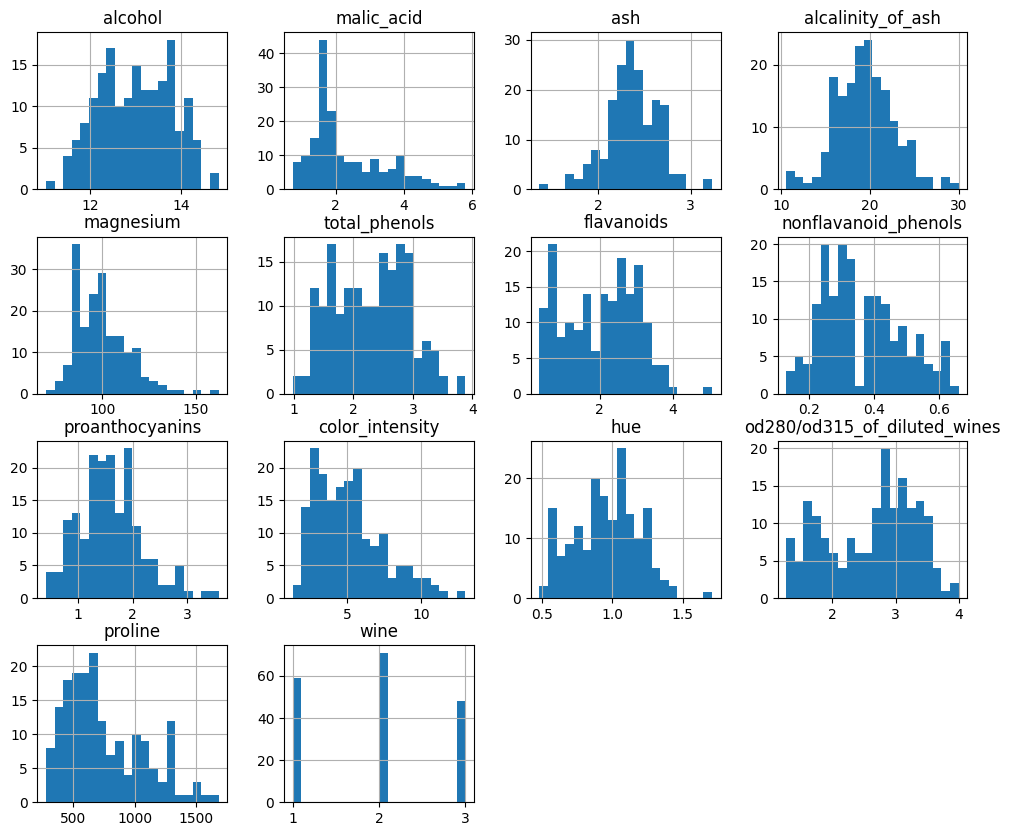

In [8]:
#histogram for each feature to understand the snkewness
import matplotlib.pyplot as plt  
wine_df.hist(figsize=(12, 10), bins=20)  
plt.show()

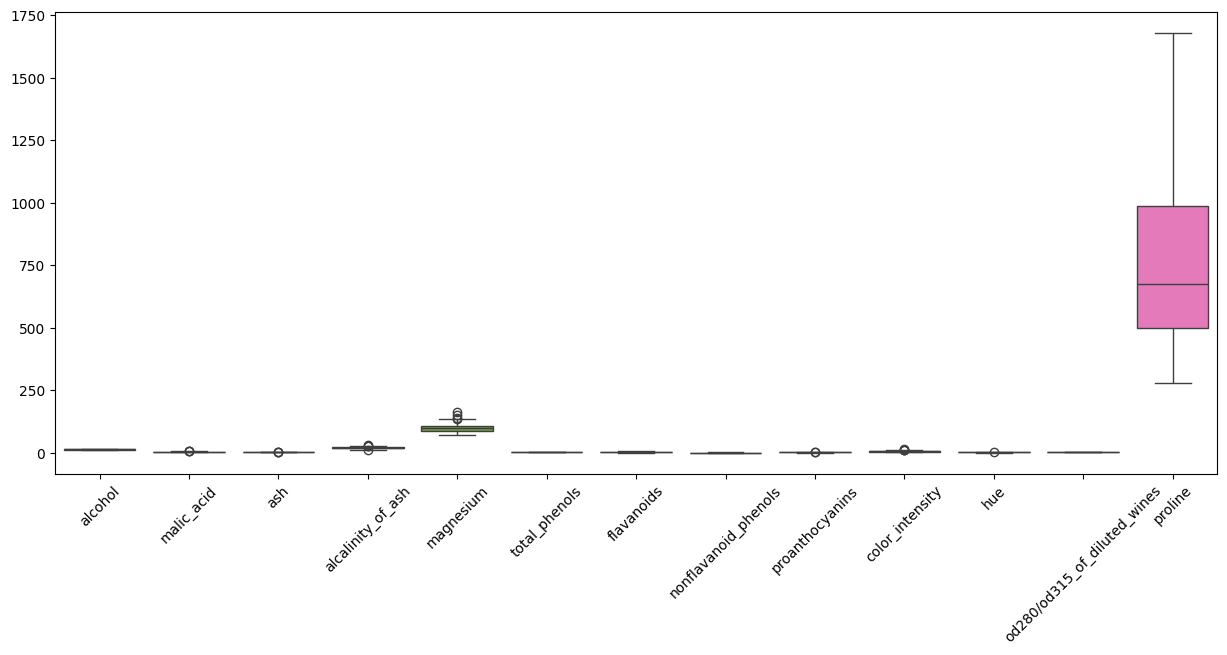

In [9]:
#box plot
import seaborn as sns  
plt.figure(figsize=(15, 6))  
sns.boxplot(data=wine_df.drop(columns=["wine"]))  # Exclude target column
plt.xticks(rotation=45)  
plt.show()

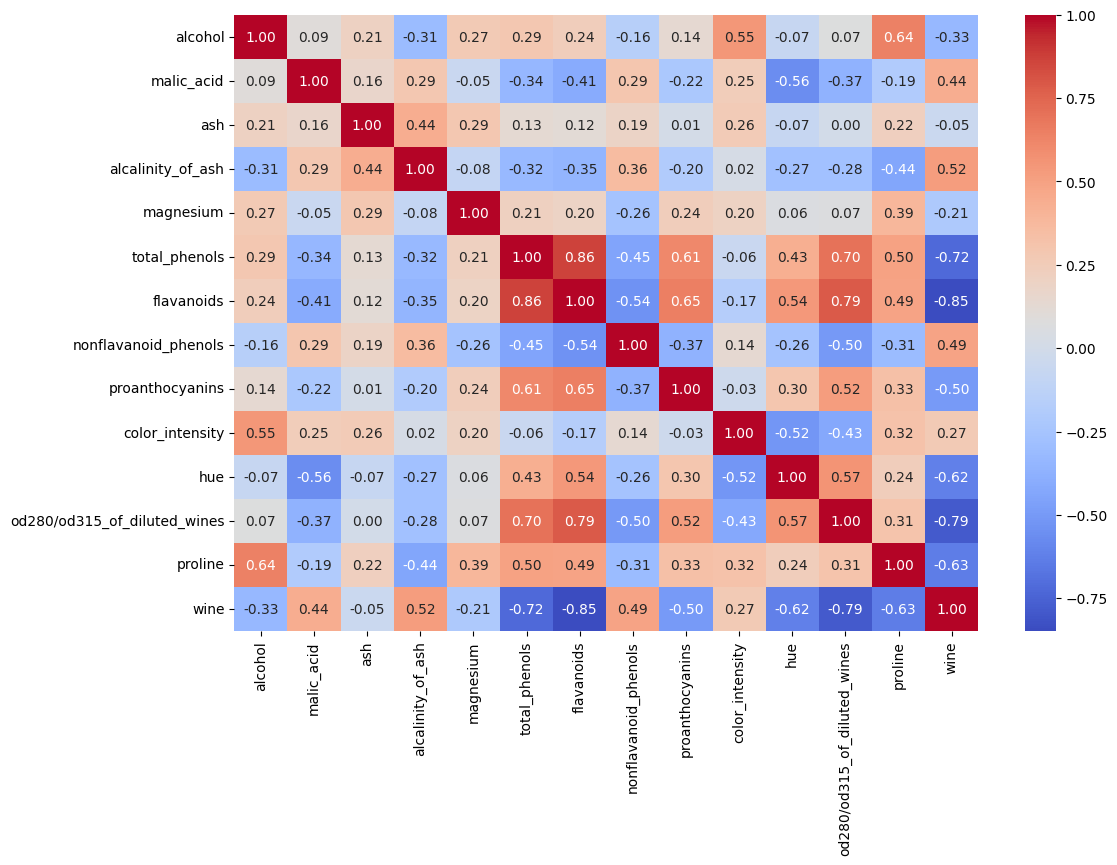

In [10]:
#heat map - warmer means features are more related and may be redundant 
import seaborn as sns  
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 8))  
sns.heatmap(wine_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")  
plt.show()


In [11]:
#converting classes from 1,2,3 to 0,1,2 because logistic regression works better with labels starting from 0 
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
wine_df['wine'] = encoder.fit_transform(wine_df['wine'])  # Directly modifying the column

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
#standardization 
scaler = StandardScaler()
wine_df.iloc[:,:-1] = scaler.fit_transform(wine_df.iloc[:,:-1])

In [14]:
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,0
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,0
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,0
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,0
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=wine_df.drop('wine',axis = 1) # X are the features
y = wine_df['wine'] #target

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =42) #30% test data

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(X_train,y_train) #fitting the training data to model

LogisticRegression()

In [21]:
y_pred = model.predict(X_test) #predicting output for test data
y_pred


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2], dtype=int64)

Evaluating performance metrics on y_predicted and y_actual(y_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9815


In [23]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')  # Use 'macro' for multiclass without considering class imbalance
print(f"Precision: {precision:.4f}")


Precision: 0.9827


In [24]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")


Recall: 0.9815


In [25]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.9816


In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]
